# Digit Classification with KNN and Naive Bayes

Implementing image recognition system for classifying digits by using KNN and Naive Bayes Models.  

Part 1 - Visualize MNIST data.  

**k-Nearest Neighbors:**  
Part 2 - Vary k in kNN   
Part 3 - Vary training sample size and predict accuracy  
Part 4 - Generate confusion matrix and determine which digits get misclassified most  
Part 5 - Apply gaussian blur to see effect of blurring on kNN modeling  

**Naive Bayes:**
Part 6 - Compare Bernoulli and Multinomial Naive Bayes models   
Part 7 - Utilize gridsearchCV and to determine optimal alpha on Bernoulli Naive Bayes  
Part 8 - Vary var_smoothing on Gaussian Naive Bayes model  
Part 9 - Generate images with Naive Bayes  
Part 10 - Determine what type of classifier Naive Bayes is  
Part 11 - Transform data to see if performance would improve for Bernoulli Naive Bayes model.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.22.1'

Loading mnist data and partition into training, development (validation), and test sets.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]                    #10,000 test data
dev_data, dev_labels = X[60000:61000], Y[60000:61000]            #1,000 development data
train_data, train_labels = X[:60000], Y[:60000]                  #60,000 training data
mini_train_data, mini_train_labels = X[:1000], Y[:1000]          #1,000 mini train data

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:
Show a 10x10 grid that visualizes 10 examples of each digit.

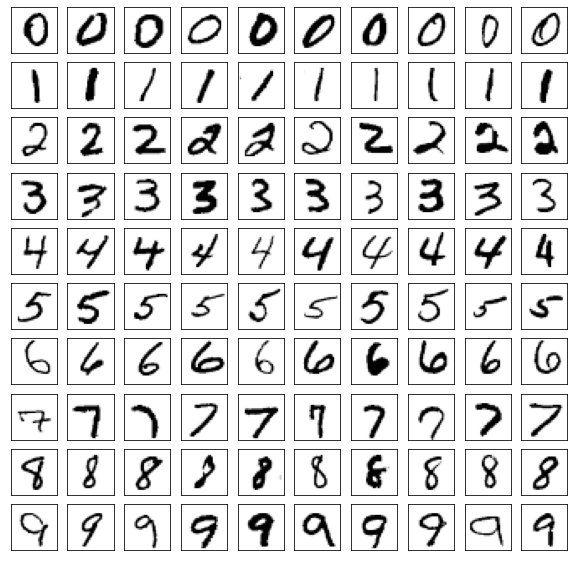

In [4]:
def P1(num_examples=10):

    """ Create a dictionary of keys for each number 0 to 9 and values for
    the position of the key in mini_train_labels and mini_train_data array
    Values will stop appending after it reaches num_examples specified
    """
    num_dict={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}   
    for num in range(0,10):
        i=0
        while len(num_dict[num]) < num_examples:
            if int(mini_train_labels[i]) == num:
                num_dict[num].append(i)
            i+=1
    
    # Initializing a figure/figure size with subplots of 10 rows and num_examples columns
    fig, axs = plt.subplots(10,num_examples, figsize=(num_examples,10))
    plt.setp(axs, xticks=(), yticks=())     # Turn off tick marks to keep things clean.
    plt.rc('image', cmap='Greys')           # Set colormap to black and white
     
    # Plotting each subplot and organizing it so that each row is for a different number
    for each in num_dict:
        for i in range(0,num_examples):
            mtd_reshape = mini_train_data[num_dict[each][i]].reshape((28,28))
            axs[each,i].imshow(mtd_reshape)
            
P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 

RESULT:  
8 is the digit that is the most difficult for the 1-Nearest Neighbor model to recognize.

For k-value = 1:  
* The analysis below shows that digits 2 and 8 had the most incorrect predictions at 22 incorrect predictions each.
* The classification report shows the number 8 had the lowest precision, recall, and F1-score.
* The confusion matrix confirms that 2 and 8 indeed had 22 incorrect predictions each.

NOTES:
* Trained on the mini train set.
* Evaluate performance on the dev (validation) set.

In [5]:
def P2(k_values):

    # Looping for each k-value
    for k in k_values:

        # Doing K-Nearest Neighbor model and predicting
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)   #fitting takes zero time because its nearest neighbor
        test_predicted_labels = model.predict(dev_data)

        # Printing the accuracy of each model
        print("For K-value = %d:" % k)
        print("Accuracy= %.3f" % classification_report(dev_labels, test_predicted_labels, output_dict=True)['accuracy'])

        # When k-value = 1, need to show precision, recall, F1 and determine
        # which digit is most difficult for the 1-Nearest Neighbor model to recognize
        if k == 1:
            # Creating a dictionary of how many wrong predictions per number
            wrong_prediction = (test_predicted_labels != dev_labels)            
            num_incorrect_dict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
            for each in dev_labels[wrong_prediction]:
                num_incorrect_dict[int(each)] += 1
            
            # Printing the digit with most wrong predictions
            print("Digit(s) with most incorrect predictions:")
            for key, value in num_incorrect_dict.items():
                if value == max(num_incorrect_dict.values()):
                    print("Digit %d had %d incorrect predictions." %(key,value))
        
            # Print out classification report and confusion matrix
            print("Classification Report:")
            print(classification_report(dev_labels, test_predicted_labels))  
            print("Confusion Matrix:")
            print(confusion_matrix(dev_labels, test_predicted_labels))
        print("")
    
    return test_predicted_labels
    
k_values = [1, 3, 5, 7, 9]
P2(k_values)

pass

For K-value = 1:
Accuracy= 0.884
Digit(s) with most incorrect predictions:
Digit 2 had 22 incorrect predictions.
Digit 8 had 22 incorrect predictions.
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Confusion Matrix:
[[101   0   1   0   0   0   1   1   2   0]
 [  0 

### Part 3:

Utilize K-Nearest Neighbors to predict different train sizes of the digit data. Utilize a linear regression model to predict accuracy of a 1-Nearest Neighbor model given training set size. Predict training set sizes of 60000, 120000, 1000000.  

RESULT:  
Due to the shape of the plot, transformation was applied to the predictor features and to the outcome that make the predictions more reasonable.  Lineplot is shown below.

For train size = 100:
Accuracy = 0.702
Digit(s) with most incorrect predictions:
Digit 9 had 57 incorrect predictions.
Time it took to model: 0.2 seconds

For train size = 200:
Accuracy = 0.791
Digit(s) with most incorrect predictions:
Digit 2 had 44 incorrect predictions.
Time it took to model: 0.3 seconds

For train size = 400:
Accuracy = 0.811
Digit(s) with most incorrect predictions:
Digit 2 had 39 incorrect predictions.
Time it took to model: 0.6 seconds

For train size = 800:
Accuracy = 0.866
Digit(s) with most incorrect predictions:
Digit 2 had 24 incorrect predictions.
Time it took to model: 1.3 seconds

For train size = 1600:
Accuracy = 0.905
Digit(s) with most incorrect predictions:
Digit 2 had 17 incorrect predictions.
Time it took to model: 2.5 seconds

For train size = 3200:
Accuracy = 0.927
Digit(s) with most incorrect predictions:
Digit 2 had 16 incorrect predictions.
Digit 8 had 16 incorrect predictions.
Time it took to model: 5.2 seconds

For train size = 6400:
Accurac

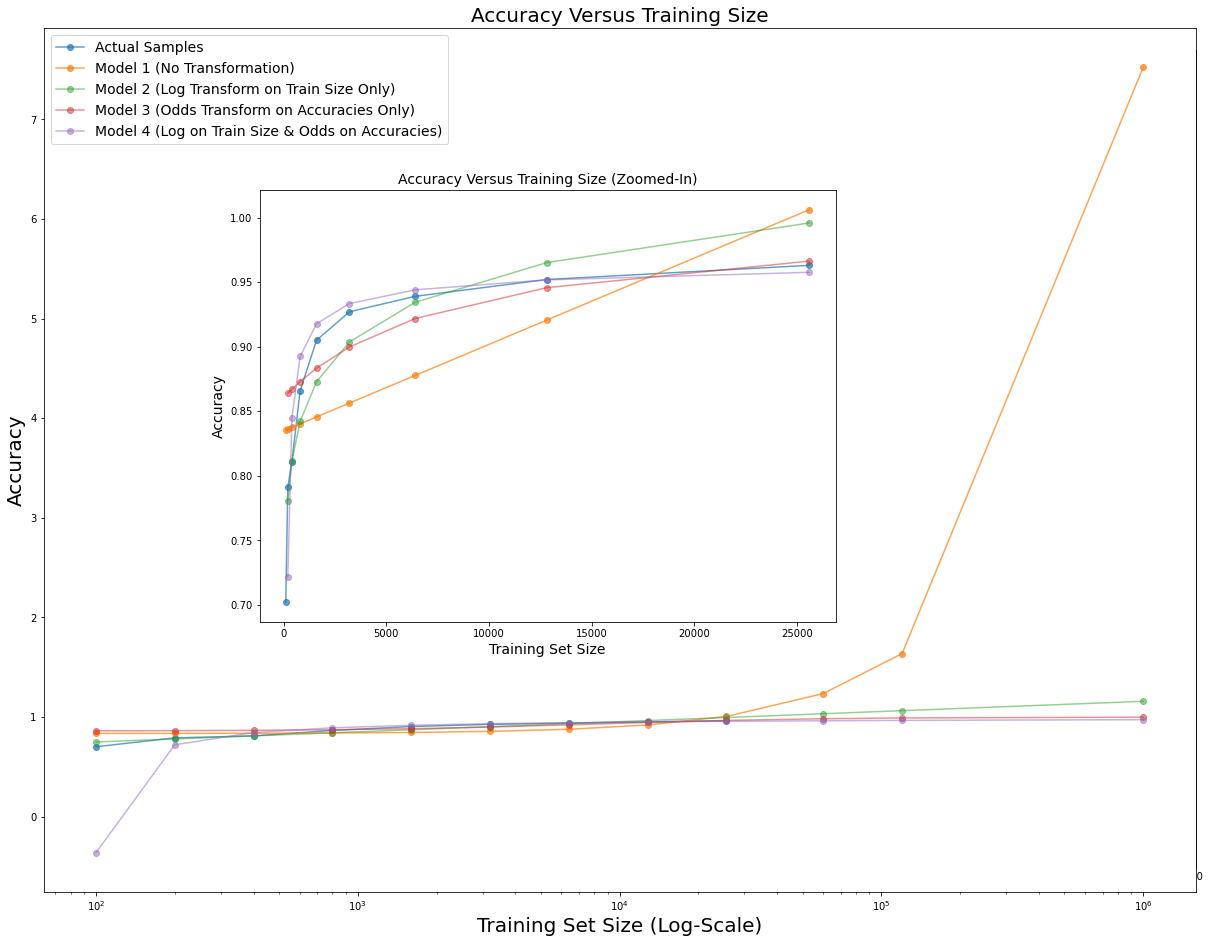

In [6]:

def P3A(train_sizes, accuracies):
    
    """ Predict digit data with kNN. Vary train sizes and return accuracies of each train size.
    """
    
    # Looping for each training size
    for i in train_sizes:
        k=1  #set k 
        start_time=time.time()  #starting timer to time program

        # Creating different sizes of training data
        mini_train_data1, mini_train_labels1 = X[:i], Y[:i]          
        
        # Fitting with K-Nearest Neighbor and predicting       
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data1, mini_train_labels1)
        test_predicted_labels = model.predict(dev_data)

        # Finding the wrong predictions
        wrong_prediction = (test_predicted_labels != dev_labels)

        # Printing accuracy of each model
        print("For train size = %d:" % i)
        acc = classification_report(dev_labels, test_predicted_labels, output_dict=True)['accuracy']
        print("Accuracy = %.3f" % acc)

        # Creating a dictionary of how many wrong predictions per number (for personal use)       
        num_incorrect_dict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
        print("Digit(s) with most incorrect predictions:")
        for each in dev_labels[wrong_prediction]:
            num_incorrect_dict[int(each)] += 1
        for key, value in num_incorrect_dict.items():
            if max(num_incorrect_dict.values()) == value:
                print("Digit %d had %d incorrect predictions." %(key,value))

        # Adding accuracy to accuracies list        
        accuracies.append(acc)
        end_time=time.time()   #end timer right after model is done predicting
        
        # Ending timer and showing the time it took to run this model
        print("Time it took to model: %.1f seconds" % round(end_time-start_time,1))
        print("")

    print("train_sizes:", train_sizes)
    print("accuracies:", accuracies)
    return accuracies

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3A(train_sizes, accuracies)
pass

def P3B(train_sizes, accuracies):

    """ Predict accuracy of a model by train size based on previous function.
    """
    # TRAINING DATA #
    
    # No Transformations
    train_sizes_t = np.transpose([train_sizes])  #tranposed
    accuracies_array = np.array(accuracies)      #array of accuracies instead of list

    # Transformations -> Log on train size, odds on accuracies
    train_sizes_log = list(np.log(train_sizes))         #log transform of train_sizes
    train_sizes_log_t = np.transpose([train_sizes_log]) #transposed
    accuracies_odds = [y/(1-y) for y in accuracies]     #odd transform of accuracies
    accuracies_odds_array = np.array(accuracies_odds)   #array of accuracies instead of list

    # PREDICTION DATA #
    
    # Train sizes to predict
    new_predict = [60000,120000,1000000]
    predict_sizes = train_sizes[:]    #initiate list of predict sizes from before
    [predict_sizes.append(i) for i in new_predict]   #add new predict sizes to predict size list
    sizes = np.array(predict_sizes)              #no transformation on sizes
    train_sizes_predict=np.transpose([sizes])    #tranposed
    sizes_log = np.log(np.array(predict_sizes))  #log transformation on sizes
    train_sizes_log_predict=np.transpose([sizes_log])   #tranposed


    # LINEAR REGRESSION -> fit with train data and predict accuracies on predict_sizes #

    #No Transformation on Input and Output
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_sizes_t, accuracies_array)                 #fit model
    print("Model 1 (No Transformation):")
    print ('Estimated function: y = %.2f + %.2fx' %(lr.intercept_, lr.coef_[0]))
    accuracies_prediction = lr.predict(train_sizes_predict)    #predict
    print("R^2:",lr.score(train_sizes_t, accuracies_array))    #Finding R^2
    # Printing the accuracies for training set sizes 60000, 120000, and 1000000
    for i in range(-3,0):
        print("Training size of %d samples has a predicted accuracy of %.3f" %(int(sizes[i]), accuracies_prediction[i]))
    print("")

    #Transformation on Input, no Transformation on output
    lr = LinearRegression(fit_intercept=True) 
    lr.fit(train_sizes_log_t, accuracies_array)      #fit model
    print("Model 2 (Log Transform on Train Size Only):")
    print ('Estimated function: y = %.2f + %.2fx' %(lr.intercept_, lr.coef_[0]))
    accuracies_prediction2 = lr.predict(train_sizes_log_predict)  #predict
    print("R^2:", lr.score(train_sizes_log_t, accuracies_array)) #Finding R^2
    # Printing the accuracies for training set sizes 60000, 120000, and 1000000
    for i in range(-3,0):
        print("Training size of %d samples has a predicted accuracy of %.3f" %(int(sizes[i]), accuracies_prediction2[i]))
    print("")

    #No Transformation on Input, Transformation on output
    lr = LinearRegression(fit_intercept=True) 
    lr.fit(train_sizes_t, accuracies_odds_array)      #fit model
    print("Model 3 (Odds Transform on Accuracies Only):")
    print ('Estimated function: y = %.2f + %.2fx' %(lr.intercept_, lr.coef_[0]))
    accuracies_odds_prediction2 = lr.predict(train_sizes_predict)  #predict
    print("R^2:", lr.score(train_sizes_t, accuracies_odds_array)) #Finding R^2
    #Convert accuracies prediction back from transformation 
    accuracies_no_odds_prediction2 = [y/(1+y) for y in accuracies_odds_prediction2]
    # Printing the accuracies for training set sizes 60000, 120000, and 1000000
    for i in range(-3,0):
        print("Training size of %d samples has a predicted accuracy of %.3f" %(int(sizes[i]), accuracies_no_odds_prediction2[i]))
    print("")

    #Transformation on Input (log) and Output (odds)
    lr = LinearRegression(fit_intercept=True) 
    lr.fit(train_sizes_log_t, accuracies_odds_array)      #fit model
    print("Model 4 (Log on Train Size & Odds on Accuracies):")
    print ('Estimated function: y = %.2f + %.2fx' %(lr.intercept_, lr.coef_[0]))
    accuracies_odds_prediction = lr.predict(train_sizes_log_predict)  #predict
    print("R^2:", lr.score(train_sizes_log_t, accuracies_odds_array)) #Finding R^2
    #Convert accuracies prediction back from transformation 
    accuracies_no_odds_prediction = [y/(1+y) for y in accuracies_odds_prediction]
    # Printing the accuracies for training set sizes 60000, 120000, and 1000000
    for i in range(-3,0):
        print("Training size of %d samples has a predicted accuracy of %.3f" %(int(sizes[i]), accuracies_no_odds_prediction[i]))

        
    # PLOTTING #
    
    #initialization of large and zoomed-in plot
    fig=plt.figure(figsize=(20,15))
    ax=fig.add_subplot(1,1,1)
    ax_m = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax_z = fig.add_axes([0.25, 0.35, .4, .4])

    ### MAIN PLOT ###
    #plotting actual data
    ax_m.plot(train_sizes_t, accuracies, label="Actual Samples", marker='o', alpha=0.7)
    #plotting no transformation predicted
    ax_m.plot(sizes, accuracies_prediction, label="Model 1 (No Transformation)", marker='o', alpha=0.7)  
    #plotting transformations on feature, no transformation on output - predicted
    ax_m.plot(sizes, accuracies_prediction2, label="Model 2 (Log Transform on Train Size Only)", marker='o', alpha=0.5)
    #plotting no transformations on feature, transformation on output - predicted
    ax_m.plot(sizes, accuracies_no_odds_prediction2, label="Model 3 (Odds Transform on Accuracies Only)", marker='o', alpha=0.5)
    #plotting transformations predicted
    ax_m.plot(sizes, accuracies_no_odds_prediction, label="Model 4 (Log on Train Size & Odds on Accuracies)", marker='o', alpha=0.5)   

    ### ZOOMED IN ###
    #plotting actual data
    ax_z.plot(train_sizes_t[:9], accuracies[:9], label="Actual Samples", marker='o', alpha=0.7)
    #plotting no transformation predicted
    ax_z.plot(sizes[:9], accuracies_prediction[:9], label="Model 1 (No Transformation)", marker='o', alpha=0.7)
    #plotting transformations on feature, no transformation on output - predicted
    ax_z.plot(sizes[1:9], accuracies_prediction2[1:9], label="Model 2 (Log Transform on Train Size Only)", marker='o', alpha=0.5)   
    #plotting no transformations on feature, transformation on output - predicted
    ax_z.plot(sizes[1:9], accuracies_no_odds_prediction2[1:9], label="Model 3 (Odds Transform on Accuracies Only)", marker='o', alpha=0.5)
    #plotting transformations predicted
    ax_z.plot(sizes[1:9], accuracies_no_odds_prediction[1:9], label="Model 4 (Log on Train Size & Odds on Accuracies)", marker='o', alpha=0.5)   

    #labels
    ax_m.set_title('Accuracy Versus Training Size', fontsize=20)
    ax_m.set_xlabel('Training Set Size (Log-Scale)', fontsize=20)
    ax_m.set_ylabel('Accuracy', fontsize=20)
    ax_m.set_xscale('log')
    ax_m.legend(loc="best", fontsize=14)
    ax_z.set_title('Accuracy Versus Training Size (Zoomed-In)', fontsize=14)
    ax_z.set_xlabel('Training Set Size', fontsize=14)
    ax_z.set_ylabel('Accuracy', fontsize=14)  


P3B(train_sizes,accuracies)

### Part 4:

Utilize a 1-Nearest Neighbor model and show the confusion matrix. Determine which pair of digits does the model confuse most often.  

RESULT:  
The digit 4 is most often confused with the digit 9.   
While digits 2 and 8 had the most incorrect predictions, 4 and 9 is the most confused pair as shown in the confusion matrix. Plots of the digit 4 in the development data shows that most of these incorrect predictions do, in fact, look similar to digit 9.

For K-value = 1:
Accuracy= 0.884
Digit(s) with most incorrect predictions:
Digit 2 had 22 incorrect predictions.
Digit 8 had 22 incorrect predictions.
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Confusion Matrix:
[[101   0   1   0   0   0   1   1   2   0]
 [  0 

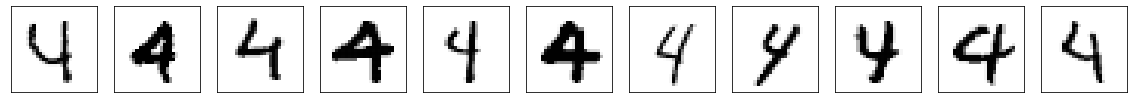

In [8]:
def P4():

### STUDENT START ###
    ########## NOTE ########## P2() function must be ran from part 2 above in order to run this code
    predicted_values = P2([1])      #Returns predicted values after model of k-value=1
    wrong_prediction = (predicted_values != dev_labels)

    #Determine which pairs were most incorrectly predicted
    cm = confusion_matrix(dev_labels, predicted_values)   #Not necessary to print b/c it is already shown in P2 function
    max_cm_location = np.where(cm == cm.argmax())  # <- shows 4 (true) and 9 (predicted) pair is most incorrectly predicted
    actual = str(list(max_cm_location[0])[0])
    predict = str(list(max_cm_location[1])[0])

    # Determine location of all and the incorrectly predicted digit in dev_label data 
    wrong_prediction_location=[]
    wrong_predication_location_actual=[]
    for i in range(0, len(wrong_prediction)):
        if wrong_prediction[i]:
            wrong_prediction_location.append(i)
            if dev_labels[i] == actual and predicted_values[i] == predict:
                wrong_predication_location_actual.append(i)        

    # Initializing a figure/figure size with subplots of 1 row and number of wrong digit 4 predictions columns
    fig, axs = plt.subplots(1,len(wrong_predication_location_actual), figsize=(20,2))
    plt.setp(axs, xticks=(), yticks=())     # Turn off tick marks to keep things clean.

    # Plotting each subplot
    print("Images of the digit %d in the pair that the model confuse most often with the digit %d" %(int(actual), int(predict)))
    count=0
    for each in wrong_predication_location_actual:
        dev_reshape = dev_data[each].reshape((28,28))
        axs[count].imshow(dev_reshape, cmap='Greys', alpha=1)
        count+=1
    
### STUDENT END ###

P4()

### Part 5:

Analyze the effect of a simplified Gaussian blur filter on accuracy by comparing the following four situations.
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

RESULT:  
It was interesting to see that the blurred only training data had a higher accuracy than blurred training and blurred dev data. The guess for this is that blurred training will generalize the model to predict even precise non-blurred dev data.  However, if you train on more precise non-blurred training data, it cannot generalize as well to blurred and non-blurred dev data.

In [9]:
def P5():

    #Padding each dataset with zeros around to more easily do gaussian blur
    #Input a row of 784 numpy array, returns 30x30 numpy array padded with zeros around original 28x28 array
    def padding(row):
        row=row.reshape(28,28)
        zeros = np.zeros(900).reshape(30,30)
        zeros[1:row.shape[0]+1,1:row.shape[1]+1] = row
        return zeros
    
    #Do gaussian blur: https://en.wikipedia.org/wiki/Kernel_(image_processing)
    #           |1   2   1|
    # (1/16) *  |2   4   2|
    #           |1   2   1|
    #Input a row of 784 numpy array, pads zeros with padding function above, and returns blurred 784 numpy array 
    def gaussian_blurr(row,w_1):
        padded_0 = padding(row)
        blurred = np.zeros(784).reshape(28,28)
        for i in range(1,29):
            for j in range(1,29):
                top = padded_0[i-1][j-1]+2*padded_0[i-1][j]+padded_0[i-1][j+1]
                mid = 2*padded_0[i][j-1]+4*padded_0[i][j]  +2*padded_0[i][j+1]
                bot = padded_0[i+1][j-1]+2*padded_0[i+1][j]+padded_0[i+1][j+1]
                blurred[i-1][j-1]=w_1*(top+mid+bot)
        return blurred.ravel()

    weight=1/16  #can change weight
    start_time=time.time()   #measuring time for curiosity
    
    # Blurring mini train data
    # Initialize with first in array
    row=mini_train_data[0]    
    g_blurred = gaussian_blurr(row,weight)
    g_blurred_mini_train_data = g_blurred
    # Loop and then vstack the rest of the arrays
    for k in range(1,mini_train_data.shape[0]):
        row = mini_train_data[k]
        g_blurred = gaussian_blurr(row,weight)
        g_blurred_mini_train_data = np.vstack((g_blurred_mini_train_data, g_blurred))

    # Blurring dev data
    # Initialize with first in array
    row=dev_data[0]    
    g_blurred = gaussian_blurr(row,weight)
    g_blurred_dev_data = g_blurred
    # Loop and then vstack the rest of the arrays
    for k in range(1,mini_train_data.shape[0]):
        row = dev_data[k]
        g_blurred = gaussian_blurr(row,weight)
        g_blurred_dev_data = np.vstack((g_blurred_dev_data, g_blurred))

    end_time = time.time()                       #measuring time for curiosity
    print("Time to blurr dataset:", end_time-start_time, "secs")  #measuring time for curiosity

    #Producing the accuracies for each of the models
    k=1   
    print("K-value = %d:" % k)
    print("Weight: %.3f" %(weight))
    # Doing K-Nearest Neighbor model and predicting

    #No Blurring
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    # Printing the accuracy of each model
    acc = model.score(dev_data, dev_labels)
    print("Accuracy of No Blurr= %.3f" % acc)

    #Blurring Training and No Blurring Dev Data
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(g_blurred_mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    # Printing the accuracy of each model
    acc = model.score(dev_data, dev_labels)
    print("Accuracy of Blurring Train= %.3f" % acc)

    #No Blurring Training and Blurring Dev Data
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(g_blurred_dev_data)
    # Printing the accuracy of each model
    acc = model.score(g_blurred_dev_data, dev_labels)
    print("Accuracy of Blurring Dev= %.3f" % acc)

    #Blurring Training and Dev Data
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(g_blurred_mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(g_blurred_dev_data)
    # Printing the accuracy of each model
    acc = model.score(g_blurred_dev_data, dev_labels)
    print("Accuracy of Blurring Train & Dev= %.3f" % acc)


P5()

Time to blurr dataset: 14.789386749267578 secs
K-value = 1:
Weight: 0.062
Accuracy of No Blurr= 0.884
Accuracy of Blurring Train= 0.904
Accuracy of Blurring Dev= 0.870
Accuracy of Blurring Train & Dev= 0.900


### Part 6:

Compare Bernoulli and Multinomial Naive Bayes.  
For Bernoulli model, map pixel values to either 0 or 1, representing white or black by utilizing 'binarize' feature.   
For Multinomial model, map pixel values to either 0, 1, or 2, representing white, gray, or black by writing function to pre-process training data.  

RESULT:  
The multinomial version did not improve results and had a slightly less accurate model with the binarize threshold of 0.1 and the multinomial thresholds of 0.1 and 0.9.  I've also tried binarize thresold of 0.5 compared to a multinomial threshold of 0.33 and 0.66. Results were the same that bernoulli model had greater accuracy.  
The reason could be because:  
1) For this image classification, we do not really need the edge (where it is gray), so the gray multinomial threshold, doesnt seem to help increase accuracy.   
2) This particular dataset is just black and white, very bimodal. A multimoldal model doesn't seem to help increase accuracy.

In [11]:
def P6():

    ### Using Bernoulli NB to produce the model
    # Fitting and Predicting
    alpha = 1
    binarize=0.1    #selected per instructions.  I
    bnb_model = BernoulliNB(alpha=alpha, binarize=binarize)
    bnb_model.fit(mini_train_data, mini_train_labels)
    #test_bnb_predicted_labels = bnb_model.predict(dev_data)
    test_bnb_predicted_labels_score = bnb_model.score(dev_data, dev_labels)

    ### Using Multinomial NB to produce the model
    # First: Map pixels to 0,1,2 set white/gray/black separation threshold to 0.1, 0.9
    # Define a function that applies a threshold to turn real valued features into 0/1/2 features.
    # 0 will mean "white", 1 will mean "gray", and 2 will mean "black".
    def tertiarize(data, thresholds=[0.1,0.9]):
        # Initialize a new feature array with the same shape as the original data.
        tertiarized_data = np.empty(data.shape)
        # Apply a threshold  to each feature.
        for feature in range(data.shape[1]):      
            for row in range(data.shape[0]):
                if data[row,feature] >= thresholds[0]:
                    if data[row,feature] <= thresholds[1]:
                        tertiarized_data[row,feature] = 1
                    else:
                        tertiarized_data[row,feature] = 2
                else:
                    tertiarized_data[row,feature] = 0
        return tertiarized_data
    # Create new tertiarized training and test data
    tertiarize_mini_train_data = tertiarize(mini_train_data)
    tertiarize_dev_data = tertiarize(dev_data)
    # Fitting and Predicting
    alpha = 1
    mnb_model = MultinomialNB(alpha=alpha)
    mnb_model.fit(tertiarize_mini_train_data, mini_train_labels)
    #test_mnb_predicted_labels = mnb_model.predict(tertiarize_dev_data)
    test_mnb_predicted_labels_score = mnb_model.score(tertiarize_dev_data, dev_labels)

    ### Show bernoulli accuracy model vs Multinomial model accuracy
    print("For Bernoulli Model with alpha=%d, binarize=%.3f:" % (alpha,binarize))
    print("Accuracy= %.3f" % test_bnb_predicted_labels_score)
    print("For Multinomial Model with alpha=%d, separation thresholds of=[%.2f, %.2f]:" % (alpha,0.1,0.9))
    print("Accuracy= %.3f" % test_mnb_predicted_labels_score)

P6()

For Bernoulli Model with alpha=1, binarize=0.100:
Accuracy= 0.814
For Multinomial Model with alpha=1, separation thresholds of=[0.10, 0.90]:
Accuracy= 0.807


### Part 7:

Utilize GridSearchCV function to determine optimal Laplace smoothing parameter (alpha).  Use Bernoulli NB, binarize thresold at 0, 5-fold cross-validation, scored based on accuracy.  

RESULT:  
Best value for alpha is 0.001.  The accuracy when alpha is near 0 is better than the accuracy when alpha is far from 0. However, alpha of 0.001 had the best accuracy while alpha of 1e-10 and 0.0001 had worse accuracies than alpha = 0.001, it appears that the model could be over fitting. It seems that the lower the alpha, the better the fit to a point then it becomes over fitting which is expected if we do not generalize.  


In [12]:
def P7(alphas):

    #Using GridSearchCV to find the best Laplace smoothing parameter (alpha)
    
    #Specify binarize = 0 per instructions
    bnb_model = BernoulliNB(binarize=0)
    
    #Run GridSearchCV with 5-fold cross-validation on mini train data set
    clf = GridSearchCV(estimator=BernoulliNB(binarize=0), param_grid=alphas, cv=5, scoring='accuracy', iid=False)
    clf.fit(mini_train_data,mini_train_labels)
    
    #printing accuracy at each alpha value
    for i in range(len(clf.cv_results_['mean_test_score'])):
        print("Alpha of %s has accuracy of %.3f" %(alphas['alpha'][i],clf.cv_results_['mean_test_score'][i]))

    return clf

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P7(alphas)
print()
print("Best alpha = ", nb.best_params_)

Alpha of 1e-10 has accuracy of 0.814
Alpha of 0.0001 has accuracy of 0.819
Alpha of 0.001 has accuracy of 0.825
Alpha of 0.01 has accuracy of 0.822
Alpha of 0.1 has accuracy of 0.818
Alpha of 0.5 has accuracy of 0.813
Alpha of 1.0 has accuracy of 0.809
Alpha of 2.0 has accuracy of 0.805
Alpha of 10.0 has accuracy of 0.783

Best alpha =  {'alpha': 0.001}


C:\Users\johnl\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


### Part 8:

Vary var_smoothing parameter in Guassian Naive Bayes (which is intended for real-valued feature and therefore, may not work so well). Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. 

RESULT:  
While the Gaussian Naive Bayes without a fix produces an accuracy of 0.593, a simple fix by changing the variance smoothing accuracy to 0.06 produces an accuracy of 0.821!  What was done was to increase the variance to a larger range because if you look at the histogram of the mini train data, most of the data is either 0 or 1. If we use a small variance for gaussian naive bayes, we may miss or weigh the 1's data too low relative to the rest of the data and therefore, not account for the 1's in the model.  Increasing the variance can increase the probabilities of these 1's showing up and therefore, the model is more accurate.  However, if you increase the variance too much, it may begin to overfit and therefore, start to lose accuracy on a development/testing data set.

Note: I had tried to vary .sigma_ and .theta_ but it turns out that var_smoothing reached higher accuaracies than I would have gotten with my methods of changing .sigma_ and .theta_ (had a hard time getting better than 0.821).

Gaussian NB accuracy before fix: 0.593
Fixed Gaussian NB with 0.060 variance smoothing accuracy: 0.821


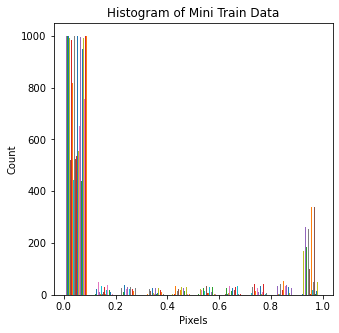

In [14]:
def P8():

   # Produce a Gaussian Naive Bayes without any fixes. Produce a second Gaussian Naive Bayes with 
    # a fix that generates about the same accuracy as the Bernoulli Naive Bayes model.
    
    #Producing Gaussian Naive Bayes with no fixes.
    gnb_model_b4 = GaussianNB()
    gnb_model_b4.fit(mini_train_data, mini_train_labels)
    #test1_gnb_predicted_labels = gnb_model_b4.predict(dev_data)
    test1_gnb_predicted_labels_score = gnb_model_b4.score(dev_data, dev_labels)
    print("Gaussian NB accuracy before fix: %.3f" %(test1_gnb_predicted_labels_score))
    
    #Producing Gaussian Naive Bayes with a fix (changing the variance smoothing parameter to 0.067)
    smooth=0.06
    gnb_model1 = GaussianNB(var_smoothing=smooth)
    gnb_model1.fit(mini_train_data, mini_train_labels)
    #test1_gnb_predicted_labels = gnb_model1.predict(dev_data)
    test1_gnb_predicted_labels_score = gnb_model1.score(dev_data, dev_labels)
    print("Fixed Gaussian NB with %.3f variance smoothing accuracy: %.3f" %(smooth,test1_gnb_predicted_labels_score))    
 
    #Plotting the histograms of Mini Train Data and Variance
    #To Explain why var_smoothing helps increase accuracy
    
    fig1=plt.figure(figsize=(5,5))
    plt.title('Histogram of Mini Train Data')
    plt.xlabel('Pixels')
    plt.ylabel('Count')
    plt.hist(mini_train_data)
    
P8()

### Part 9:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

RESULT:  
The generated digit images are definitely much more blurry than the training digit images and shows a lot of discontinuity (as a human, I wouldn't draw a number with 784 pixels but would draw a continuous line). However, it is possible to recognize most of the generated images, as a human, and therefore, I call this a success.

Generated Images on Top
Mini Train Data Images on Bottom


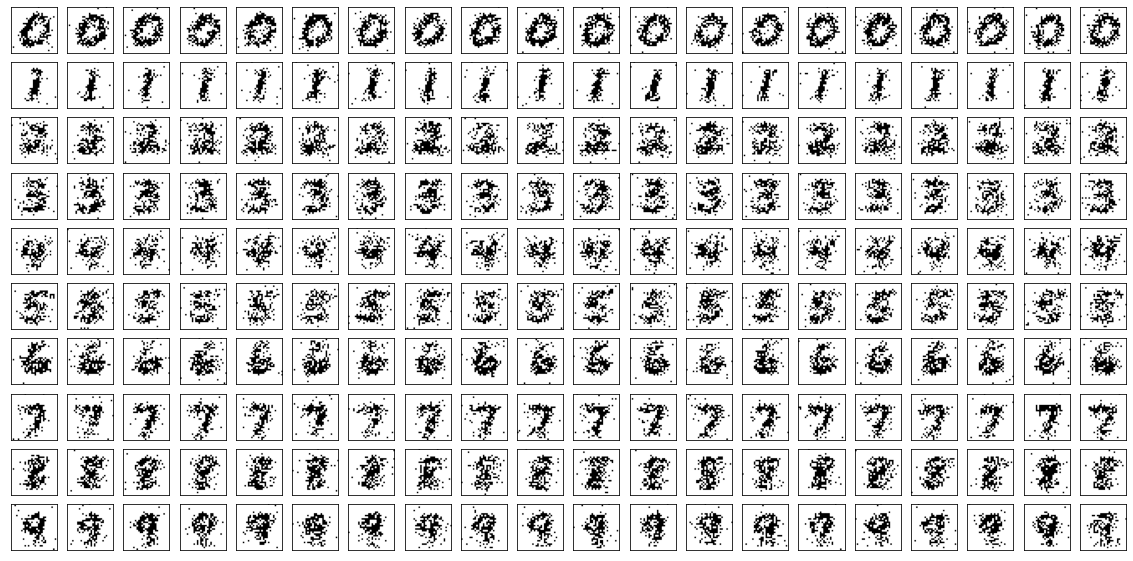

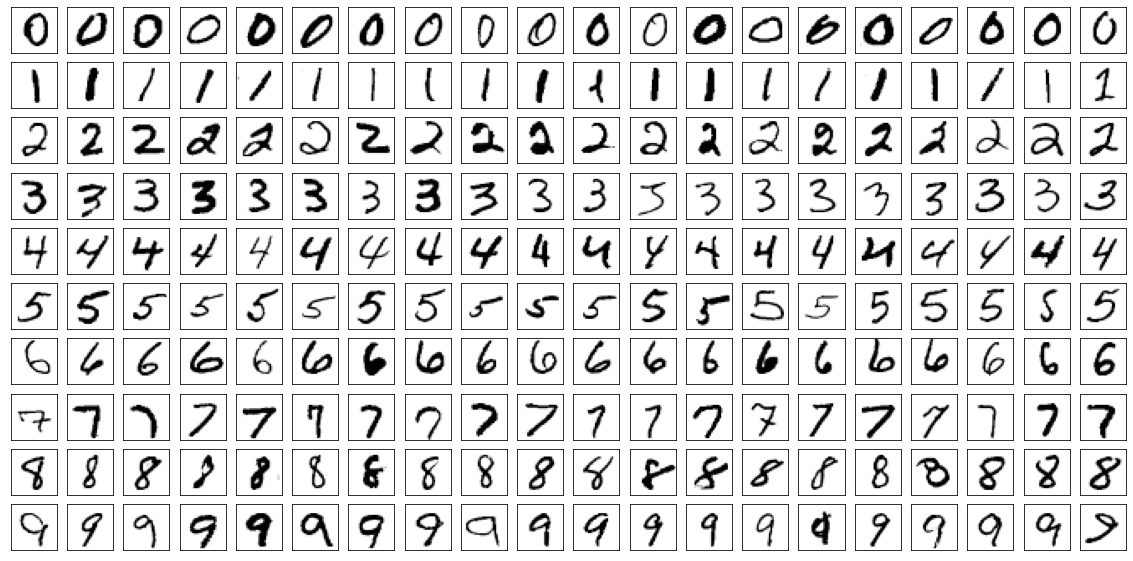

In [15]:
def P9(num_examples):

    #Generating images from Bernoulli Naive Bayes Model
    #Using Bernoulli NB to produce the model
    alpha = 1
    binarize=0.1  #Same as previous questions
    bnb_model = BernoulliNB(alpha=alpha, binarize=binarize)
    bnb_model.fit(mini_train_data, mini_train_labels)
    likelihood = np.exp(bnb_model.feature_log_prob_)                # Gather the likelihood probabilities P(Xi|Y)

    # Compare likelihood probabilities with a uniform random number to account for randomness 
    # If likelihood probability is greater than random number, then 1 for black, else 0 for white
    def gen(digit):
        digit_likelihood = likelihood[digit]      #784 features of a digit (p(x_i|y))
        generated_digit=[]                       #new list of pixels
        for c in digit_likelihood:
            if np.random.rand() < c:  
                generated_digit.append(1)
            else:
                generated_digit.append(0)
        generated_digit = np.array(generated_digit)
        return generated_digit

    digits = [0,1,2,3,4,5,6,7,8,9]
    # Initializing a figure/figure size with subplots of 10 rows and num_examples columns
    # 20 examples of each digit
    fig, axs = plt.subplots(len(digits),num_examples, figsize=(num_examples,len(digits)))
    plt.setp(axs, xticks=(), yticks=())     # Turn off tick marks to keep things clean.
    plt.rc('image', cmap='Greys')           # Set colormap to black and white

    print("Generated Images on Top")
    for digit in digits:
        for i in range(0,num_examples):
            generated_digit = gen(digit)
            mtd_reshape = generated_digit.reshape((28,28))
            axs[digit][i].imshow(mtd_reshape)

    print("Mini Train Data Images on Bottom")
    P1(20) ########## NOTE ########## P1() function must be ran from part 1 above in order to run this code

    
P9(20)

### Part 10:

Determine what type of classifer is Bernoulli Naive Bayes model.  
Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Steps:
Partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.


RESULT:  
This Bernoulli Naive Bayes model is a weakly calibrated classifier.  This is because the posterior probabilities do not match the accuracy meaning it cannot be a strongly calibrated classifier.  However, there appears to be a positive correlation such that the higher the posterior probability, the higher the accuracy. This makes it a weakly calibrated classifier as opposed to a poorly calibrated classifier. 

NOTE: The buckets are separated like a histogram per instructions as opposed to from 0 to each threshold. For example, the 0.9 bucket is from 0.5 to 0.9 instead of 0 to 0.9. This is in regards to a comment from Todd's office hours.

In [14]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    
    # Using Bernoulli NB to produce the model
    alpha = 0.001
    binarize=0
    bnb_model_11 = BernoulliNB(alpha=alpha, binarize=binarize)
    bnb_model_11.fit(mini_train_data, mini_train_labels)   #train with mini_train_data
    bnb_predicted_labels = bnb_model_11.predict(dev_data)  #predict on dev_data
    posteriors = bnb_model_11.predict_proba(dev_data)      #save the posterior probabilities from dev_data prediction

    # Partition dev set into buckets based on posterior probabilities of predicted classes
    
    # First, create a list of dev_data row and maximum (posterior) probability in the row
    max_post=[]
    for i in range(len(posteriors)):
        max_post.append([i,max(posteriors[i])])   #[row location, max posterior value in each row]

    # Create bins with 
    # key: bucket/threshold  
    # value: row in the dataset that has posterior probability less than or equal to this threshold
    bins={}    #using a dictionary for this task
    for i in buckets:
        bins[i]=[]
    for post in max_post:
        for bin in bins:
            if post[1] <= bin:
                bins[bin].append(post[0])
                break           
    
    # Create a list (total) to show the total number of rows in each bucket
    counter1=0
    for each in bins:
        total[counter1] = len(bins[each])
        counter1+=1
    
    # Create a list (correct) to show the number of correct predictions in each bucket
    counter2=0
    for each in buckets:
        right = 0
        for each in bins[each]:
            if dev_labels[each] == bnb_predicted_labels[each]:
                right += 1
        correct[counter2] = right
        counter2+=1

    print("Correct:",correct)
    print("Total:", total)
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

Correct: [0, 11, 29, 27, 30, 48, 26, 34, 618]
Total: [0, 31, 67, 59, 46, 62, 33, 43, 659]
p(pred) is 0.0000000000000 to 0.5000000000000    total =   0    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  31    accuracy = 0.355
p(pred) is 0.9000000000000 to 0.9990000000000    total =  67    accuracy = 0.433
p(pred) is 0.9990000000000 to 0.9999900000000    total =  59    accuracy = 0.458
p(pred) is 0.9999900000000 to 0.9999999000000    total =  46    accuracy = 0.652
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.774
p(pred) is 0.9999999990000 to 0.9999999999900    total =  33    accuracy = 0.788
p(pred) is 0.9999999999900 to 0.9999999999999    total =  43    accuracy = 0.791
p(pred) is 0.9999999999999 to 1.0000000000000    total = 659    accuracy = 0.938


### Part 11:

Transform the data to see if Bernoulli Naive Bayes model can result in a better performance.  

RESULT:  
    
I applied the following data transformations to see if there will be an increased accuracy from the base Bernoulli Naive Bayes model. The last 4 models did in fact increase in accuracy. These were the models where you added new features by average each row, averaging each column, summing each row, and a combination of all 4 (averaging and summing row and column).    
It is interesting to note that when you average a row versus when you sum a row, the accuracies appear the same, the thought is that youre not chancing the variance of the data but simply shifting the data which will just shift the predictions. 

Data Transformations:

1) Base Bernoulli NB model

2) Bernoulli NB model with averaging pixel values in each row and replacing pixels in each row with averaged value  
---a) Training set Only  
---b) Dev Set Only  
---c) Both Training and Dev Set  
3) Bernoulli NB model with summing pixel values in each row and replacing pixels in each row with summed value  
---a) Training set Only  
---b) Dev Set Only  
---c) Both Training and Dev Set  
4) Bernoulli NB model with averaging pixel values in each column and replacing pixels in each column with averaged value  
---a) Training set Only  
---b) Dev Set Only  
---c) Both Training and Dev Set  

5) Bernoulli NB model with averaging pixel values in each row and adding as a new feature (28 extra features)  
6) Bernoulli NB model with summing pixel values in each row and adding as a new feature (28 extra features)  
7) Bernoulli NB model with averaging pixel values in each column and adding as a new feature (28 extra features)  
8) Bernoulli NB model with averaging pixel values in each row and adding as a new feature (116 extra features = 28*4 + 4)  


In [16]:
def P11():

    # Producing the base Bernoulli NB model
    bnb_model_12_base = BernoulliNB()  #using only default parameters
    bnb_model_12_base.fit(mini_train_data, mini_train_labels)
    print("1) Accuracy of Base Model= %.3f" % bnb_model_12_base.score(dev_data, dev_labels))
    print("")
    
    
    
    # Producing Bernoulli NB model by averaging pixel values in each row and replacing pixels with averaged value
    mtd=mini_train_data.copy()   #copying data, shorter names
    dd=dev_data.copy()           #copying data, shorter names

    #Create function for averaging each row in data and setting each pixel in the row to the averaged value
    def a_row(row):
        reshaped = np.zeros(784).reshape(28,28)
        for i in range(28):
            reshaped[i] = np.average(row.reshape((28,28))[i])
        return reshaped.ravel()

    #Average Rows for Mini_Train_Data
    avg_row_mini_train_data = a_row(mtd[0])    #initiate np array
    for k in range(1,mini_train_data.shape[0]):
        avg_row = a_row(mtd[k])
        avg_row_mini_train_data = np.vstack((avg_row_mini_train_data, avg_row))

    #Average Rows for Dev_Data
    avg_row_dev_data = a_row(dd[0])    #initiate np array
    for k in range(1,dev_data.shape[0]):
        avg_row = a_row(dd[k])
        avg_row_dev_data = np.vstack((avg_row_dev_data, avg_row))

    #Printing accuracies for average row on mini_train_data or dev_data or both    
    bnb_model_12_1a = BernoulliNB()  #avg row only mini_train_data
    bnb_model_12_1a.fit(avg_row_mini_train_data, mini_train_labels)
    print("2a) Accuracy of Avg Row Mini Train and Regular Dev Data= %.3f" % bnb_model_12_1a.score(dev_data, dev_labels))
    bnb_model_12_1b= BernoulliNB()  #avg row only dev_data
    bnb_model_12_1b.fit(mini_train_data, mini_train_labels)
    print("2b) Accuracy of Regular Mini Train and Avg Row Dev Data= %.3f" % bnb_model_12_1b.score(avg_row_dev_data, dev_labels))
    bnb_model_12_1c = BernoulliNB()  #avg row mini_train_data & dev_data
    bnb_model_12_1c.fit(avg_row_mini_train_data, mini_train_labels)
    print("2c) Accuracy of Avg Row Mini Train and Avg Row Dev Data= %.3f" % bnb_model_12_1c.score(avg_row_dev_data, dev_labels))    
    print("")
    
    
    
    # Producing Bernoulli NB model by summing pixel values in each row and replacing pixels with summed value
    #Create function for summing each row in data and setting each pixel in the row to the summed value
    def s_row(row):
        reshaped = np.zeros(784).reshape(28,28)
        for i in range(28):
            reshaped[i] = np.sum(row.reshape((28,28))[i])
        return reshaped.ravel()

    #Summing Rows for Mini_Train_Data
    sum_row_mini_train_data = a_row(mtd[0])    #initiate np array
    for k in range(1,mini_train_data.shape[0]):
        sum_row = s_row(mtd[k])
        sum_row_mini_train_data = np.vstack((sum_row_mini_train_data, sum_row))

    #Summing Rows for Dev_Data
    sum_row_dev_data = a_row(dd[0])    #initiate np array
    for k in range(1,dev_data.shape[0]):
        sum_row = s_row(dd[k])
        sum_row_dev_data = np.vstack((sum_row_dev_data, sum_row))

    #Printing accuracies for sum of each row on mini_train_data or dev_data or both    
    bnb_model_12_1d = BernoulliNB()  #avg row only mini_train_data
    bnb_model_12_1d.fit(avg_row_mini_train_data, mini_train_labels)
    print("3a) Accuracy of Sum Row Mini Train and Regular Dev Data= %.3f" % bnb_model_12_1d.score(dev_data, dev_labels))
    bnb_model_12_1e= BernoulliNB()  #avg row only dev_data
    bnb_model_12_1e.fit(mini_train_data, mini_train_labels)
    print("3b) Accuracy of Regular Mini Train and Sum Row Dev Data= %.3f" % bnb_model_12_1e.score(avg_row_dev_data, dev_labels))
    bnb_model_12_1f = BernoulliNB()  #avg row mini_train_data & dev_data
    bnb_model_12_1f.fit(avg_row_mini_train_data, mini_train_labels)
    print("3c) Accuracy of Sum Row Mini Train and Sum Row Dev Data= %.3f" % bnb_model_12_1f.score(avg_row_dev_data, dev_labels))    
    print("")

    
    
    # Producing Bernoulli NB model by averaging pixel values in each column and replacing pixels with averaged value
    #Create function for averaging each column in data and setting each pixel in the column to the averaged value
    def a_column(column):
        reshaped = np.zeros(784).reshape(28,28)
        for i in range(28):
            reshaped[:,i] = np.average(column.reshape((28,28))[:,i])
        return reshaped.ravel()

    #Average Columns for Mini_Train_Data
    avg_column_mini_train_data = a_column(mtd[0])   #initiate np array
    for k in range(1,mini_train_data.shape[0]):
        avg_column = a_column(mtd[k])
        avg_column_mini_train_data = np.vstack((avg_column_mini_train_data, avg_column))

    #Average Columns for Dev_Data
    avg_column_dev_data = a_column(dd[0])     #initiate np array
    for k in range(1,dev_data.shape[0]):
        avg_column = a_column(dd[k])
        avg_column_dev_data = np.vstack((avg_column_dev_data, avg_column))

    #Printing accuracies for average column on mini_train_data or dev_data or both    
    bnb_model_12_2a = BernoulliNB()  #avg row only mini_train_data
    bnb_model_12_2a.fit(avg_column_mini_train_data, mini_train_labels)
    print("4a) Accuracy of Avg Column Mini Train and Regular Dev Data= %.3f" % bnb_model_12_2a.score(dev_data, dev_labels))
    bnb_model_12_2b= BernoulliNB()  #avg row only dev_data
    bnb_model_12_2b.fit(mini_train_data, mini_train_labels)
    print("4b) Accuracy of Regular Mini Train and Avg Column Dev Data= %.3f" % bnb_model_12_2b.score(avg_column_dev_data, dev_labels))
    bnb_model_12_2c = BernoulliNB()  #avg row mini_train_data & dev_data
    bnb_model_12_2c.fit(avg_column_mini_train_data, mini_train_labels)
    print("4c) Accuracy of Avg Column Mini Train and Avg Column Dev Data= %.3f" % bnb_model_12_2c.score(avg_column_dev_data, dev_labels))    
    print("")

    
    
    # Producing Bernoulli NB model by averaging pixel values in each row and adding as a new feature
    #Create function for averaging each row in data and adding 28 new features
    def a_row_feature(row):
        reshaped = np.zeros(812).reshape(28,29)
        reshaped[0:28,0:28] = row.reshape(28,28)
        for i in range(28):
            reshaped[i][28] = np.average(row.reshape((28,28))[i])
        return reshaped.ravel()

    #Average Rows for Mini_Train_Data
    avg_row_feature_mtd = a_row_feature(mtd[0])    #initiate np array
    for k in range(1,mini_train_data.shape[0]):
        avg_row = a_row_feature(mtd[k])
        avg_row_feature_mtd = np.vstack((avg_row_feature_mtd, avg_row))

    #Average Rows for Dev_Data
    avg_row_feature_dd = a_row_feature(dd[0])    #initiate np array
    for k in range(1,dev_data.shape[0]):
        avg_row = a_row_feature(dd[k])
        avg_row_feature_dd = np.vstack((avg_row_feature_dd, avg_row))

    #Printing accuracies for average row on mini_train_data or dev_data or both    
    bnb_model_12_3a = BernoulliNB()  #avg row mini_train_data & dev_data
    bnb_model_12_3a.fit(avg_row_feature_mtd, mini_train_labels)
    print("5) Accuracy of New Feature with Avg Rows= %.3f" % bnb_model_12_3a.score(avg_row_feature_dd, dev_labels))    
    print("")
    
    
    # Producing Bernoulli NB model by summing pixel values in each row and adding as a new feature
    #Create function for suming each row in data and adding 28 new features
    def s_row_feature(row):
        reshaped = np.zeros(812).reshape(28,29)
        reshaped[0:28,0:28] = row.reshape(28,28)
        for i in range(28):
            reshaped[i][28] = np.sum(row.reshape((28,28))[i])
        return reshaped.ravel()

    #Average Rows for Mini_Train_Data
    sum_row_feature_mtd = s_row_feature(mtd[0])    #initiate np array
    for k in range(1,mini_train_data.shape[0]):
        sum_row = s_row_feature(mtd[k])
        sum_row_feature_mtd = np.vstack((sum_row_feature_mtd, sum_row))

    #Average Rows for Dev_Data
    sum_row_feature_dd = s_row_feature(dd[0])    #initiate np array
    for k in range(1,dev_data.shape[0]):
        sum_row = s_row_feature(dd[k])
        sum_row_feature_dd = np.vstack((sum_row_feature_dd, sum_row))

    #Printing accuracies for average row on mini_train_data or dev_data or both    
    bnb_model_12_3b = BernoulliNB()  #avg row mini_train_data & dev_data
    bnb_model_12_3b.fit(sum_row_feature_mtd, mini_train_labels)
    print("6) Accuracy of New Feature with Sum Rows= %.3f" % bnb_model_12_3b.score(sum_row_feature_dd, dev_labels))    
    print("")

    
    
    # Producing Bernoulli NB model by averaging pixel values in each column and adding as a new feature
    mtd=mini_train_data.copy()   #copying data, shorter names
    dd=dev_data.copy()           #copying data, shorter names

    #Create function for averaging each column in data and adding 28 new features
    def a_column_feature(column):
        reshaped = np.zeros(812).reshape(29,28)
        reshaped[0:28,0:28] = column.reshape(28,28)
        for i in range(28):
            reshaped[28][i] = np.average(column.reshape((28,28))[:,i])
        return reshaped.ravel()

    #Average Columns for Mini_Train_Data
    avg_column_feature_mtd = a_column_feature(mtd[0])   #initiate np array
    for k in range(1,mini_train_data.shape[0]):
        avg_column = a_column_feature(mtd[k])
        avg_column_feature_mtd = np.vstack((avg_column_feature_mtd, avg_column))

    #Average Columns for Dev_Data
    avg_column_feature_dd = a_column_feature(dd[0])     #initiate np array
    for k in range(1,dev_data.shape[0]):
        avg_column = a_column_feature(dd[k])
        avg_column_feature_dd = np.vstack((avg_column_feature_dd, avg_column))

    #Printing accuracies for average column on mini_train_data or dev_data or both    
    bnb_model_12_4a = BernoulliNB()  #avg row mini_train_data & dev_data
    bnb_model_12_4a.fit(avg_column_feature_mtd, mini_train_labels)
    print("7) Accuracy of New Feature with Avg Columns= %.3f" % bnb_model_12_4a.score(avg_column_feature_dd, dev_labels))    
    print("")

    
    
    # Producing Bernoulli NB model by averaging and summing pixel values in each row and column and adding as a new feature
    #Create function for averaging each row in data and adding 116 new features
    def as_row_col_feature(data):
        reshaped = np.zeros(900).reshape(30,30)
        reshaped[0:28,0:28] = data.reshape(28,28)
        for i in range(28):
            reshaped[i][28] = np.average(data.reshape((28,28))[i])    #29th column = average of each row
            reshaped[i][29] = np.average(data.reshape((28,28))[i])    #30th column = sum of each row
            reshaped[28][i] = np.average(data.reshape((28,28))[:,i])   #29th row = average of each column
            reshaped[29][i] = np.average(data.reshape((28,28))[:,i])   #30th row = sum of each column
        return reshaped.ravel()

    #Average Rows for Mini_Train_Data
    avgsum_rowcol_feature_mtd = as_row_col_feature(mtd[0])    #initiate np array
    for k in range(1,mini_train_data.shape[0]):
        avgsum_rowcol = as_row_col_feature(mtd[k])
        avgsum_rowcol_feature_mtd = np.vstack((avgsum_rowcol_feature_mtd, avgsum_rowcol))

    #Average Rows for Dev_Data
    avgsum_rowcol_feature_dd = as_row_col_feature(dd[0])    #initiate np array
    for k in range(1,dev_data.shape[0]):
        avgsum_rowcol = as_row_col_feature(dd[k])
        avgsum_rowcol_feature_dd = np.vstack((avgsum_rowcol_feature_dd, avgsum_rowcol))

    #Printing accuracies for average row on mini_train_data or dev_data or both    
    bnb_model_12_5a = BernoulliNB()  #avg row mini_train_data & dev_data
    bnb_model_12_5a.fit(avgsum_rowcol_feature_mtd, mini_train_labels)
    print("8) Accuracy of New Feature with Avg Rows/Cols and Sum Rows/Cols= %.3f" % bnb_model_12_5a.score(avgsum_rowcol_feature_dd, dev_labels))    
    print("")
    
    

P11()

1) Accuracy of Base Model= 0.809

2a) Accuracy of Avg Row Mini Train and Regular Dev Data= 0.126
2b) Accuracy of Regular Mini Train and Avg Row Dev Data= 0.114
2c) Accuracy of Avg Row Mini Train and Avg Row Dev Data= 0.385

3a) Accuracy of Sum Row Mini Train and Regular Dev Data= 0.126
3b) Accuracy of Regular Mini Train and Sum Row Dev Data= 0.114
3c) Accuracy of Sum Row Mini Train and Sum Row Dev Data= 0.385

4a) Accuracy of Avg Column Mini Train and Regular Dev Data= 0.118
4b) Accuracy of Regular Mini Train and Avg Column Dev Data= 0.181
4c) Accuracy of Avg Column Mini Train and Avg Column Dev Data= 0.305

5) Accuracy of New Feature with Avg Rows= 0.814

6) Accuracy of New Feature with Sum Rows= 0.814

7) Accuracy of New Feature with Avg Columns= 0.815

8) Accuracy of New Feature with Avg Rows/Cols and Sum Rows/Cols= 0.816

